In [1]:
NET = 'multi_lstm_init'

import tensorflow as tf
import datasets
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

if NET == 'dilation':
    import experiments.dilation as experiments
if NET == 'segnet':
    import experiments.segnet as experiments
elif NET == 'lstm':
    import experiments.lstm as experiments
elif NET == 'coloring':
    import experiments.coloring as experiments
elif NET == 'crossing':
    import experiments.crossing as experiments
elif NET == 'unet':
    import experiments.unet as experiments
elif NET == 'multi_lstm':
    import experiments.multi_lstm as experiments
elif NET == 'multi_lstm_init':
    import experiments.multi_lstm_init as experiments
elif NET == 'FF':
    import experiments.FF as experiments
elif NET == 'optimal_lstm':
    import experiments.optimal_lstm as experiments


        

        id: 0,
        name: DATA_C0_D0,
        dataset_path: ,
        num_images_training: 10.0,
        num_images_testing: 10000.0,
        complexity: 0,
        

        

        id: 1,
        name: DATA_C0_D0,
        dataset_path: ,
        num_images_training: 10.0,
        num_images_testing: 10000.0,
        complexity: 0,
        

        

        id: 2,
        name: DATA_C1_D0,
        dataset_path: ,
        num_images_training: 10.0,
        num_images_testing: 10000.0,
        complexity: 1,
        

        

        id: 3,
        name: DATA_C1_D0,
        dataset_path: ,
        num_images_training: 10.0,
        num_images_testing: 10000.0,
        complexity: 1,
        

        

        id: 4,
        name: DATA_C2_D0,
        dataset_path: ,
        num_images_training: 10.0,
        num_images_testing: 10000.0,
        complexity: 2,
        

        

        id: 5,
        name: DATA_C2_D0,
        dataset_path: ,
        num_images_train

In [2]:
output_path = '/om/user/shobhita/src/insideness/' + NET + '/'
id = 654 #specific ID we want to get activations for
run_opt = experiments.get_best_of_the_family(output_path, id)
opt_datasets = datasets.get_datasets(output_path)

811


In [3]:
import matplotlib.pyplot as plt

for opt in [run_opt[-2]]:
    
    for opt_data in [opt_datasets[52]]:
        with open(opt.log_dir_base + opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
            data_point = pickle.load(f)
        
        print('--------------------')
        print(opt.name)
        print(opt_data.log_name)

TypeError: 'Experiments' object does not support indexing

In [3]:
print(len(data_point[0][0][0]))

NameError: name 'data_point' is not defined

In [4]:
#getting activations for a specific ID
opt = run_opt
print(run_opt)

opt_data = [opt_datasets[52]][0]
with open(opt.log_dir_base + opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
    data_point = pickle.load(f)
    print("-----")
    print(opt.name)
    print(opt_data.log_name)

-----
ID654_MultiLSTMInit_D68
ID52_DATA_C6_D0


In [6]:
import matplotlib.pyplot as plt

for opt in run_opt:
    
    for opt_data in [opt_datasets[52]]:
        with open(opt.log_dir_base + opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
            data_point = pickle.load(f)
        
        print('--------------------')
        print(opt.name)
        print(opt_data.log_name)


TypeError: 'Experiments' object is not iterable

0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55


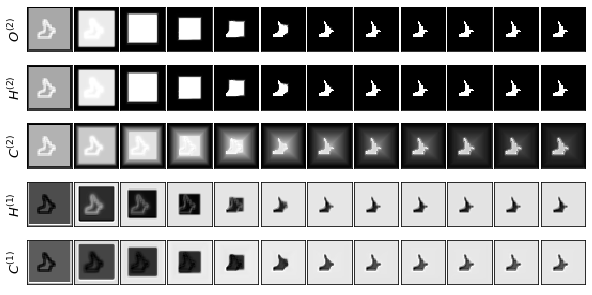

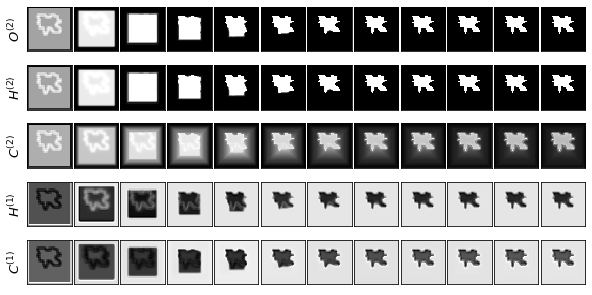

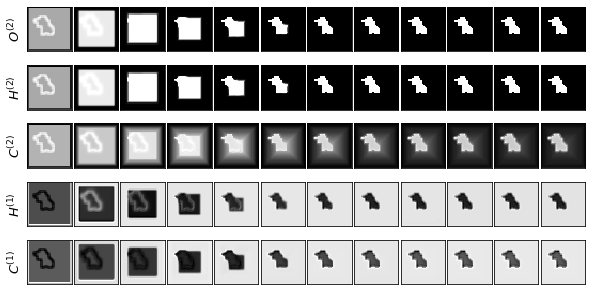

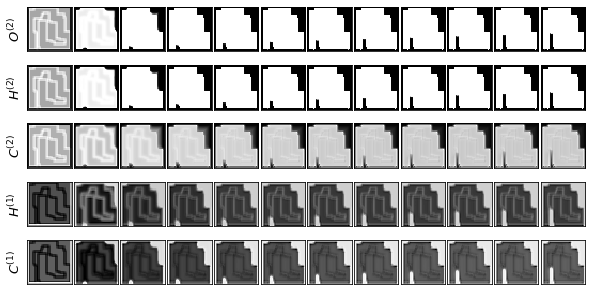

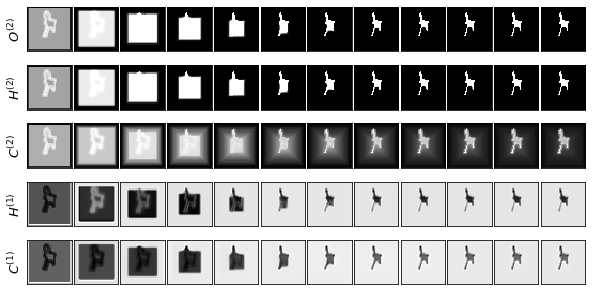

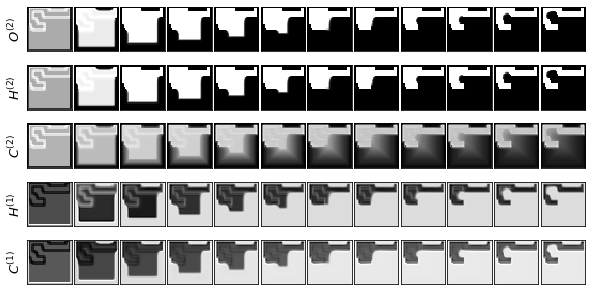

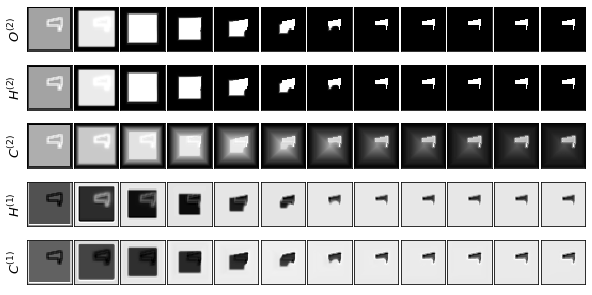

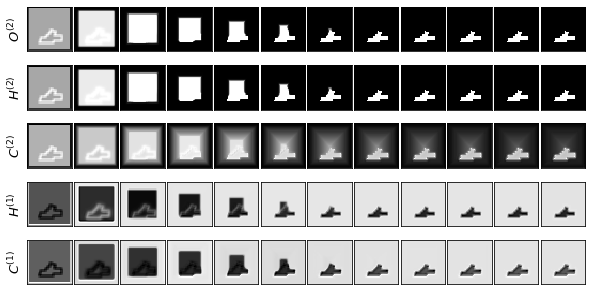

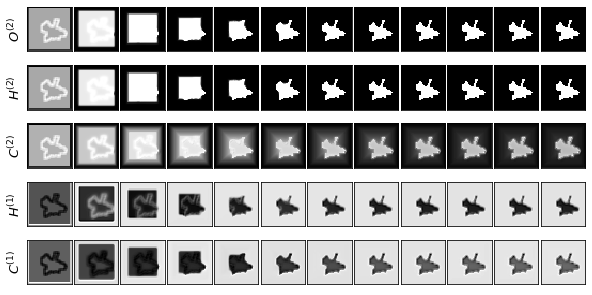

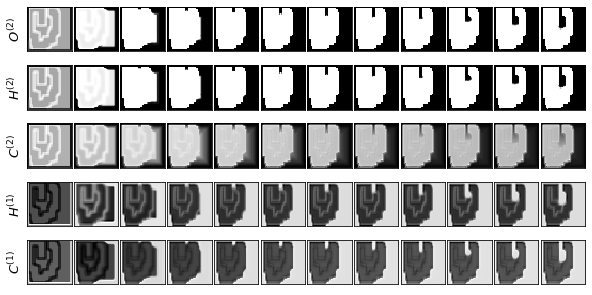

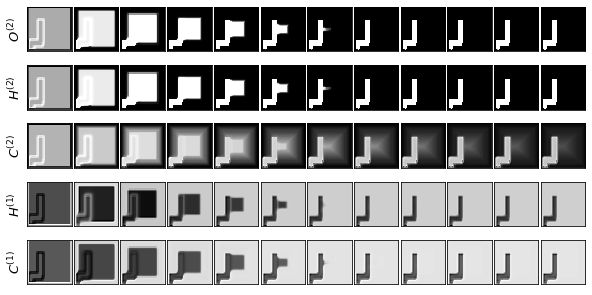

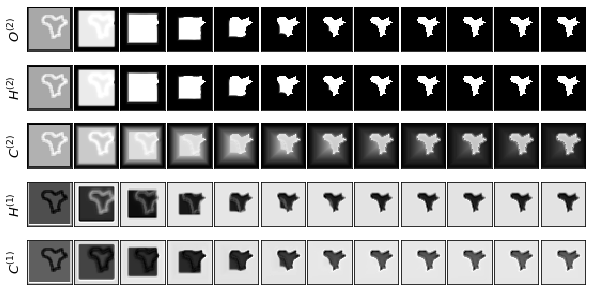

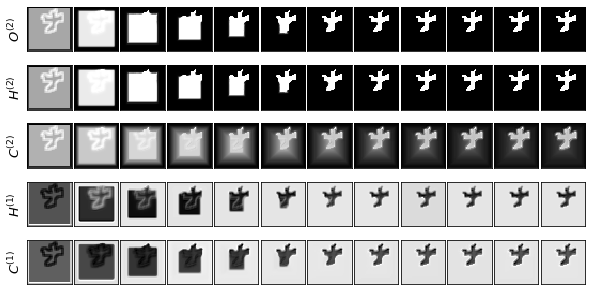

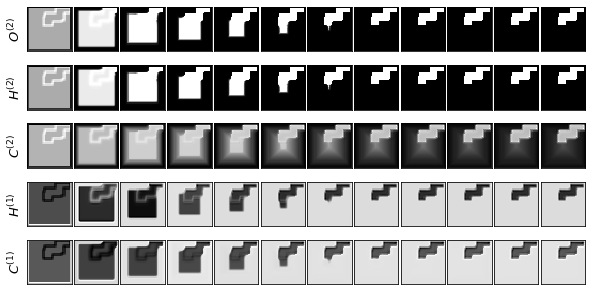

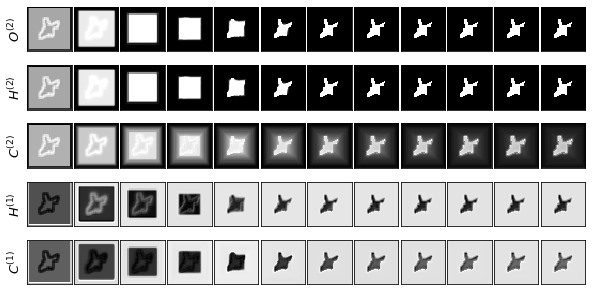

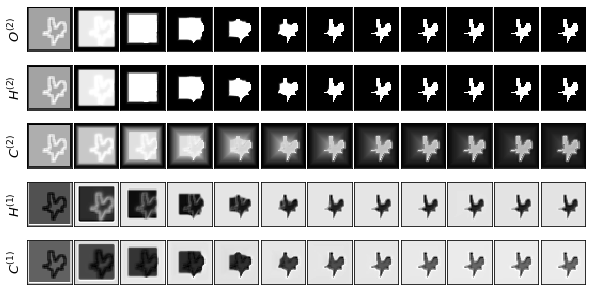

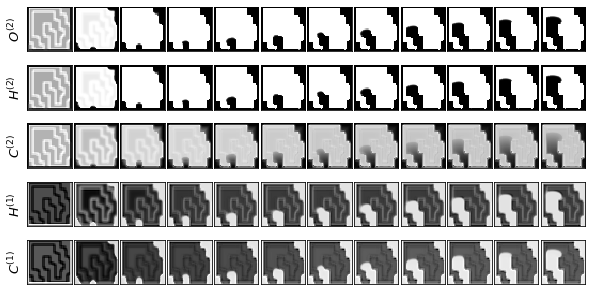

In [14]:
#Generating figure for the insideness NeurIPS paper
plt.rcParams.update({'font.size': 13})
for num_image in range(0,17):
    fig = plt.figure(figsize=(10, 7.5))
    columns = 12
    rows=7
    plt.subplots_adjust(wspace=0.05, hspace=0)    


    ax = []

    #BATCH, SAVE, LAYER, TIME, C/H
    im_count = 1
    
    for k in range(0,59,5):#,columns*(rows-1)):
        print(k)
        
        #OUTPUT SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][3][k][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$O^{(2)}$' )
            plt.tick_params(labelsize=18)
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        #HIDDEN SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, 1*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][1][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$H^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        ''' 
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][1][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        '''
        
        #C SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][0][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$C^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][0][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
         #HIDDEN - FIRST LSTM
        ax.append( fig.add_subplot(rows, columns, 3*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][0][k][1][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$H^{(1)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        #C - FIRST LSTM
        ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][0][k][0][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$C^{(1)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
       
#         for kk in range(2):
#             #OUTPUT FIRST LAYER
#             ax.append( fig.add_subplot(rows, columns, (kk+5)*columns+im_count) )
#             plt.imshow(np.squeeze(-data_point[0][0][2][k][num_image,:,:,2*kk]), cmap='gray') #15:45
#             if k==0:
#                 plt.ylabel('$O^{(1)}$ ex.'+ str(kk) )
#             ax[-1].get_xaxis().set_ticks([])
#             ax[-1].get_yaxis().set_ticks([])
        
        im_count+=1

    fig.savefig('/om/user/shobhita/src/insideness/activation_figs/activation_fig_'+ str(num_image) + '.pdf', format='pdf', bbox_inches='tight',dpi=100)

0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55
0
5
10
15
20
25
30
35
40
45
50
55


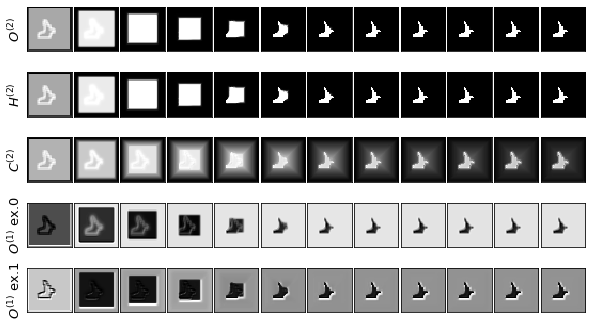

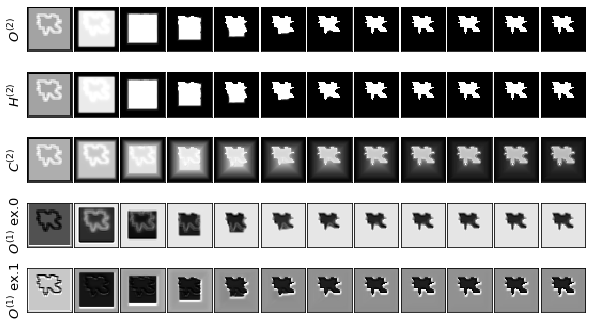

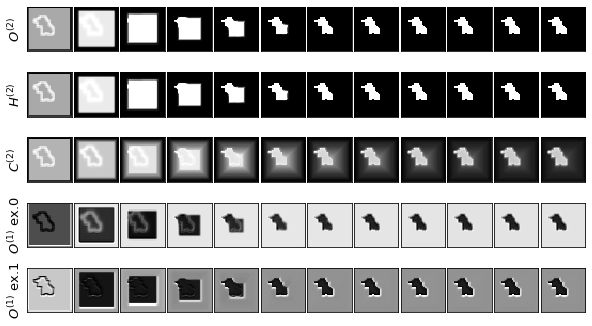

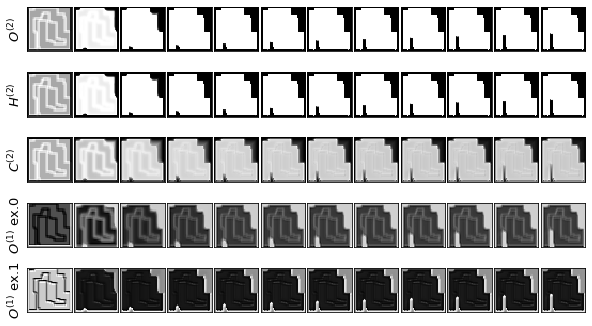

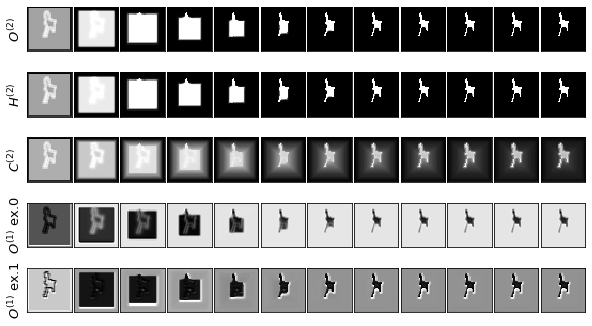

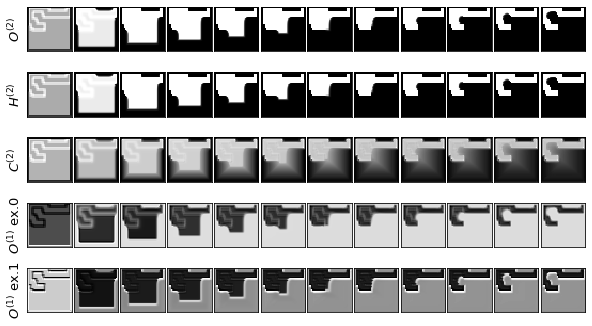

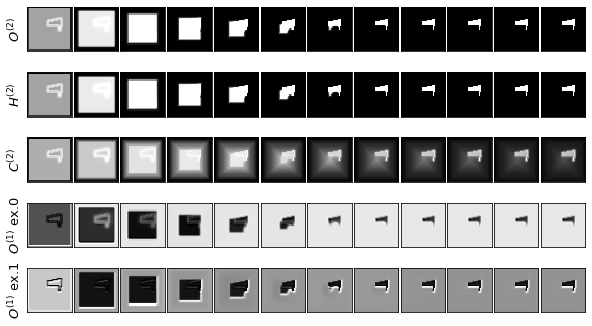

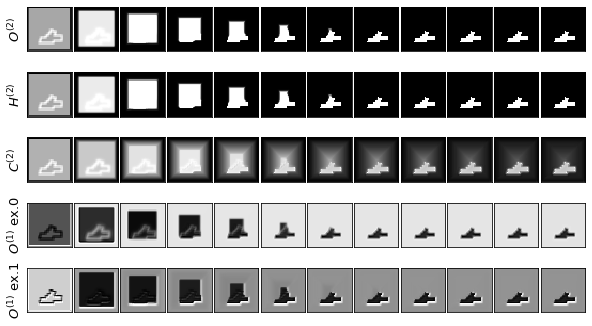

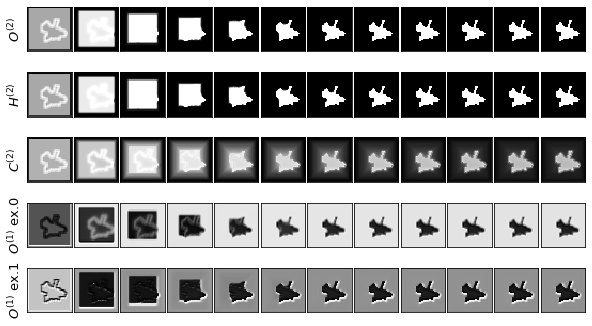

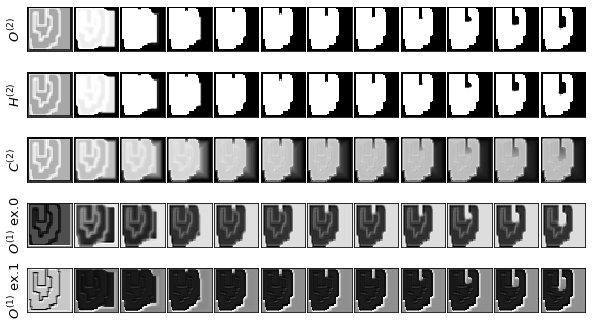

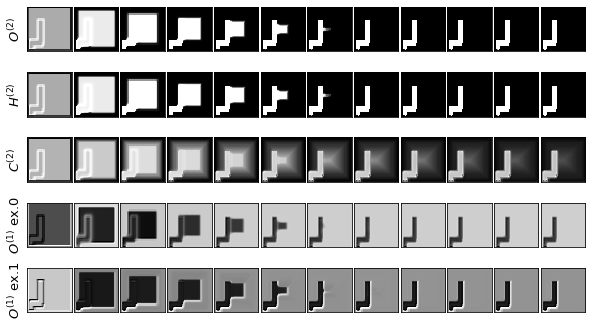

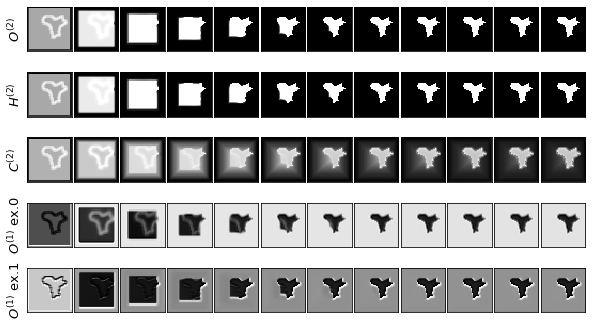

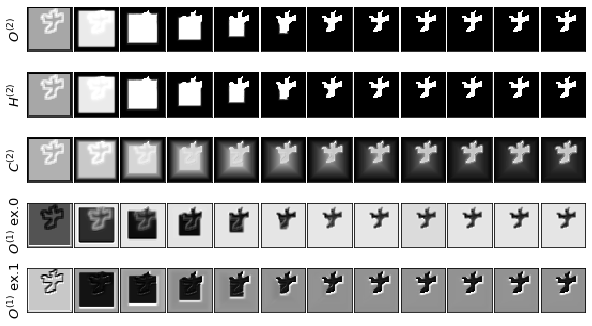

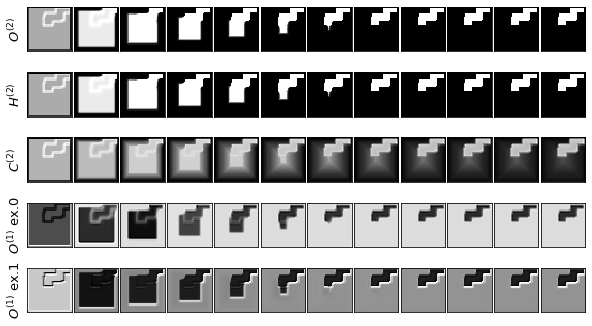

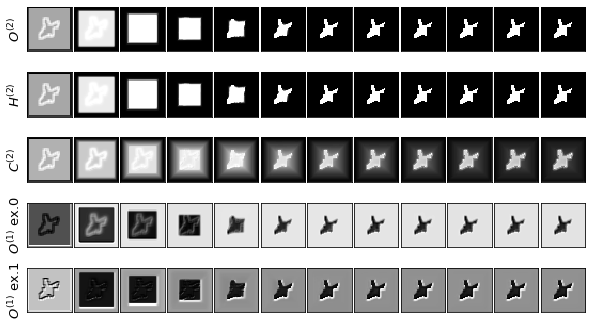

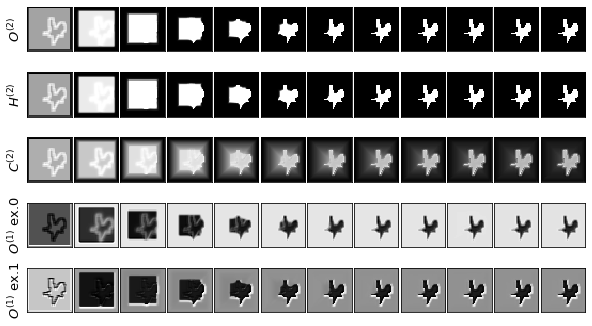

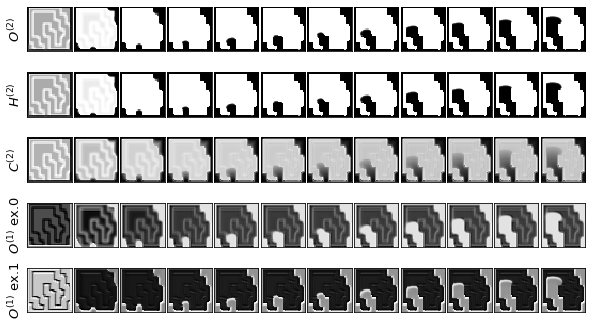

In [32]:
plt.rcParams.update({'font.size': 13})
for num_image in range(0,17):
    fig = plt.figure(figsize=(10, 6))
    columns = 12
    rows=5
    plt.subplots_adjust(wspace=0.05, hspace=0)    


    ax = []

    #BATCH, SAVE, LAYER, TIME, C/H
    im_count = 1
    
    for k in range(0,59,5):#,columns*(rows-1)):
        print(k)
        #OUTPUT SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][3][k][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$O^{(2)}$' )
            plt.tick_params(labelsize=18)
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        #HIDDEN SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][1][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$H^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        ''' 
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][1][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        '''
        
        #C SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][0][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$C^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][0][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        for kk in range(2):
            #OUTPUT FIRST LAYER
            ax.append( fig.add_subplot(rows, columns, (kk+3)*columns+im_count) )
            plt.imshow(np.squeeze(-data_point[0][0][2][k][num_image,:,:,2*kk]), cmap='gray') #15:45
            if k==0:
                plt.ylabel('$O^{(1)}$ ex.'+ str(kk) )
            ax[-1].get_xaxis().set_ticks([])
            ax[-1].get_yaxis().set_ticks([])
        
        im_count+=1
    fig.savefig('/om/user/shobhita/src/insideness/activation_fig_'+ str(num_image) + '.pdf', format='pdf', bbox_inches='tight',dpi=1000)

IndexError: list index out of range

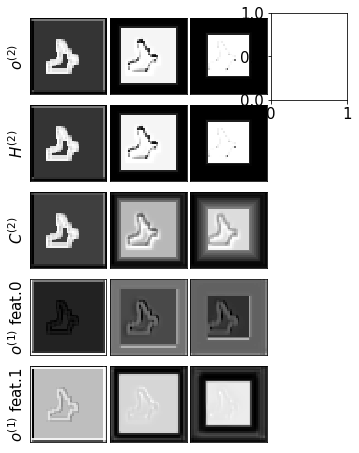

In [6]:
plt.rcParams.update({'font.size': 15})
for num_image in range(0,17):
    fig = plt.figure(figsize=(10, 8))
    columns = 7
    rows=5
    plt.subplots_adjust(wspace=0.05, hspace=0)    


    ax = []

    #BATCH, SAVE, LAYER, TIME, C/H
    im_count = 1
    for k in range(0,24,4):#,columns*(rows-1)):
        
        #OUTPUT SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][3][k][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$o^{(2)}$' )
            plt.tick_params(labelsize=18)
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        #HIDDEN SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][1][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$H^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        ''' 
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][1][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        '''
        
        #C SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][0][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$C^{(2)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][0][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        for kk in range(2):
            #OUTPUT FIRST LAYER
            ax.append( fig.add_subplot(rows, columns, (kk+3)*columns+im_count) )
            plt.imshow(np.squeeze(-data_point[0][0][2][k][num_image,:,:,kk]), cmap='gray') #15:45
            if k==0:
                plt.ylabel('$o^{(1)}$ feat.'+ str(kk) )
            ax[-1].get_xaxis().set_ticks([])
            ax[-1].get_yaxis().set_ticks([])
        
        im_count+=1
    fig.savefig('./fig/lstm_vis/complete'+ str(num_image) + '.pdf', format='pdf', bbox_inches='tight',dpi=1000)


In [8]:
import matplotlib.pyplot as plt

for opt in [run_opt[0]]:
    
    for opt_data in [opt_datasets[52]]:
        with open(opt.log_dir_base + opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
            data_point = pickle.load(f)
        
        print('--------------------')
        print(opt.name)
        print(opt_data.log_name)

FileNotFoundError: [Errno 2] No such file or directory: '/om/user/xboix/share/insideness/multi_lstm_init/ID0_Coloring/results/activations_DATAID52_DATA_C6_D0.pkl'

In [ ]:
plt.rcParams.update({'font.size': 15})
for num_image in range(0,17):
    fig = plt.figure(figsize=(10, 5))
    columns = 7
    rows=3
    plt.subplots_adjust(wspace=0.05, hspace=0)    


    ax = []

    #BATCH, SAVE, LAYER, TIME, C/H
    im_count = 1
    for k in range(0,24,4):#,columns*(rows-1)):
        
        #OUTPUT SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][1][k][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$O^{(1)}$' )
            plt.tick_params(labelsize=18)
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        #HIDDEN SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][0][k][1][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$H^{(1)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        ''' 
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][1][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        '''
        
        #C SECOND LAYER
        ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
        plt.imshow(np.squeeze(-data_point[0][0][0][k][0][num_image,:,:,0]), cmap='gray') #15:45
        if k==0:
            plt.ylabel('$C^{(1)}$')
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        ''' 
        ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
        plt.imshow(np.squeeze(data_point[0][0][1][k][0][num_image,:,:,1]), cmap='gray') #15:45
        ax[-1].get_xaxis().set_ticks([])
        ax[-1].get_yaxis().set_ticks([])
        
        for kk in range(2):
            #OUTPUT FIRST LAYER
            ax.append( fig.add_subplot(rows, columns, (kk+3)*columns+im_count) )
            plt.imshow(np.squeeze(data_point[0][0][2][k][num_image,:,:,kk]), cmap='gray') #15:45
            if k==0:
                plt.ylabel('$o^{(1)}$ feat.'+ str(kk) )
            ax[-1].get_xaxis().set_ticks([])
            ax[-1].get_yaxis().set_ticks([])
        ''' 
        im_count+=1
    fig.savefig('./fig/lstm_vis/math'+ str(num_image) + '.pdf', format='pdf', bbox_inches='tight', dpi=1000)


In [ ]:
for i in range(0,4,2):
    print(i)